In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

mujer_hombre={'FEM':'violet','MASC':'mediumblue'}

def generos_labels(lista):
    lista_nueva=[]
    for x in range(0,len(lista)):
        if('MASC' in str(lista[x]).upper()):
            lista_nueva.append('Masculino');
        else:
            lista_nueva.append('Femenino');
    return lista_nueva;

In [2]:
plt.rc('figure',dpi=100);

In [3]:
postulantes_genero_y_edad=pd.read_csv("../Data/datos_navent_fiuba/fiuba_2_postulantes_genero_y_edad.csv");
postulantes_genero_y_edad=postulantes_genero_y_edad[postulantes_genero_y_edad['sexo']!='NO_DECLARA']
postulantes_genero_y_edad.head()

,idpostulante,fechanacimiento,sexo
0,NM5M,1970-12-03,FEM
1,5awk,1962-12-04,FEM
2,ZaO5,1978-08-10,FEM
3,NdJl,1969-05-09,MASC
4,eo2p,1981-02-16,MASC


Text(0.5,1,'Cantidad de Postulantes por Género')

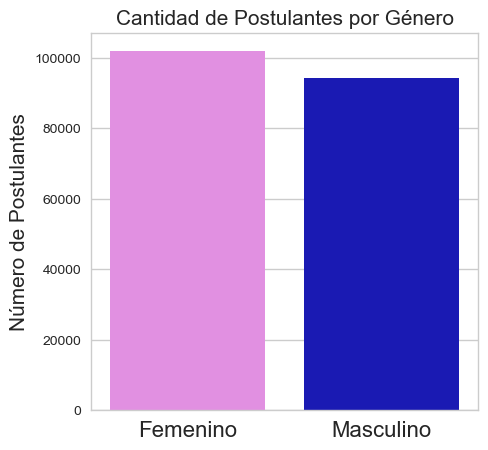

In [4]:
plt.figure(figsize=(5,5));
graf = sns.countplot(x='sexo', data=postulantes_genero_y_edad, order=postulantes_genero_y_edad['sexo'].value_counts().index, orient='v', palette=mujer_hombre)
graf.set_xticklabels(generos_labels(graf.get_xticklabels()),rotation=0, fontsize=16)
graf.set_xlabel("", fontsize=15)
graf.set_ylabel("Número de Postulantes", fontsize=15)
graf.set_title("Cantidad de Postulantes por Género", fontsize=15)

In [5]:
postulantes_educacion = pd.read_csv("../Data/datos_navent_fiuba/fiuba_1_postulantes_educacion.csv");
postulantes_educacion.head()

,idpostulante,nombre,estado
0,NdJl,Posgrado,En Curso
1,8BkL,Universitario,En Curso
2,1d2B,Universitario,En Curso
3,NPBx,Universitario,En Curso
4,NPBx,Master,En Curso


In [6]:
postulantes_educacion['estado'].value_counts()

Graduado      194474
En Curso       78531
Abandonado     25226
Name: estado, dtype: int64

In [7]:
postulantes_educacion_universitaria_completa=postulantes_educacion[(postulantes_educacion['nombre']=='Universitario')&(postulantes_educacion['estado']=='Graduado')];
postulantes_educacion_universitaria_completa.head()

,idpostulante,nombre,estado
671,5awk,Universitario,Graduado
674,NdJl,Universitario,Graduado
676,eo2p,Universitario,Graduado
678,8BkL,Universitario,Graduado
681,NPBx,Universitario,Graduado


In [8]:
postulantes_educacion_universitaria_completa = pd.merge(postulantes_educacion_universitaria_completa, postulantes_genero_y_edad, on='idpostulante', how='inner');
postulantes_educacion_universitaria_completa.head()

,idpostulante,nombre,estado,fechanacimiento,sexo
0,5awk,Universitario,Graduado,1962-12-04,FEM
1,NdJl,Universitario,Graduado,1969-05-09,MASC
2,eo2p,Universitario,Graduado,1981-02-16,MASC
3,8BkL,Universitario,Graduado,1976-07-21,FEM
4,NPBx,Universitario,Graduado,1981-03-09,MASC


Text(0.5,1,'Postulantes con Universidad Completada por Género')

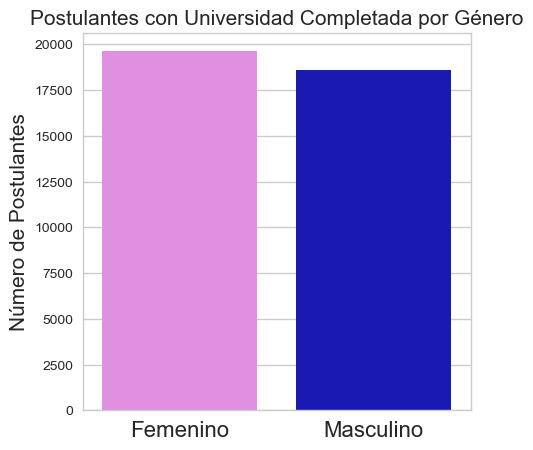

In [9]:
plt.figure(figsize=(5,5));
graf = sns.countplot(x='sexo', data=postulantes_educacion_universitaria_completa, order=postulantes_educacion_universitaria_completa['sexo'].value_counts().index, orient='v', palette=mujer_hombre)
graf.set_xticklabels(generos_labels(graf.get_xticklabels()),rotation=0, fontsize=16)
graf.set_xlabel("", fontsize=15)
graf.set_ylabel("Número de Postulantes", fontsize=15)
graf.set_title("Postulantes con Universidad Completada por Género", fontsize=15)

In [10]:
postulantes_educacion_secundario_abandonado=postulantes_educacion[(postulantes_educacion['nombre']=='Secundario')&(postulantes_educacion['estado']=='Abandonado')];
postulantes_educacion_secundario_abandonado.head()

,idpostulante,nombre,estado
3602,1zDrrO,Secundario,Abandonado
3665,1rKDV3,Secundario,Abandonado
3746,6QGDAL,Secundario,Abandonado
7550,eZBaPp,Secundario,Abandonado
7634,5ME3OZ,Secundario,Abandonado


In [11]:
postulantes_educacion_secundario_abandonado = pd.merge(postulantes_educacion_secundario_abandonado, postulantes_genero_y_edad, on='idpostulante', how='inner');
postulantes_educacion_secundario_abandonado.head()

,idpostulante,nombre,estado,fechanacimiento,sexo
0,1zDrrO,Secundario,Abandonado,1972-01-29,MASC
1,1rKDV3,Secundario,Abandonado,1977-08-04,FEM
2,6QGDAL,Secundario,Abandonado,1961-07-24,MASC
3,eZBaPp,Secundario,Abandonado,1971-05-31,FEM
4,5ME3OZ,Secundario,Abandonado,1982-10-07,MASC


Text(0.5,1,'Postulantes con Secundario Abandonado por Género')

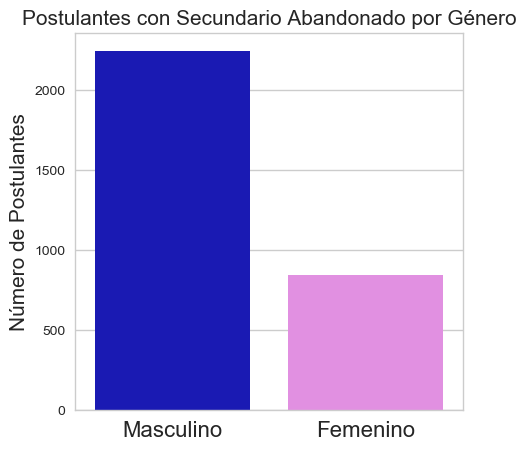

In [12]:
plt.figure(figsize=(5,5));
graf = sns.countplot(x='sexo', data=postulantes_educacion_secundario_abandonado, order=postulantes_educacion_secundario_abandonado['sexo'].value_counts().index, orient='v', palette=mujer_hombre)
graf.set_xticklabels(generos_labels(graf.get_xticklabels()),rotation=0,fontsize=16)
graf.set_xlabel("", fontsize=15)
graf.set_ylabel("Número de Postulantes", fontsize=15)
graf.set_title("Postulantes con Secundario Abandonado por Género", fontsize=15)

In [13]:
postulantes_educacion_completada_con_genero=pd.merge(postulantes_educacion[postulantes_educacion['estado']=='Graduado'], postulantes_genero_y_edad, on='idpostulante', how='inner');
postulantes_educacion_abandonada_con_genero=pd.merge(postulantes_educacion[postulantes_educacion['estado']=='Abandonado'], postulantes_genero_y_edad, on='idpostulante', how='inner');
postulantes_educacion_en_curso_con_genero=pd.merge(postulantes_educacion[postulantes_educacion['estado']=='En curso'], postulantes_genero_y_edad, on='idpostulante', how='inner');

Text(0,0.5,'Postulantes')

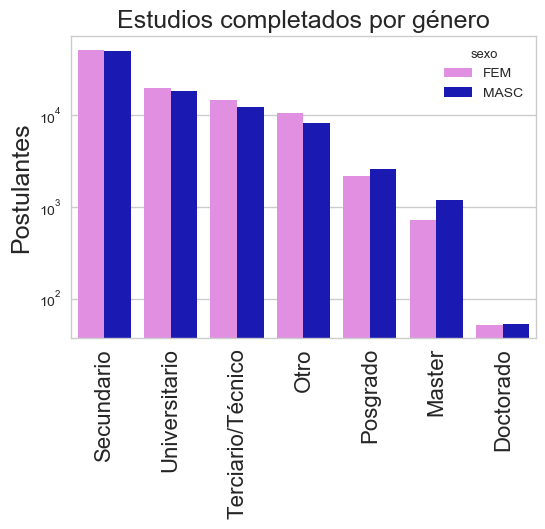

In [14]:
graf = sns.countplot(x="nombre", hue="sexo", data=postulantes_educacion_completada_con_genero, palette=mujer_hombre, order=postulantes_educacion_completada_con_genero['nombre'].value_counts().index);
graf.set_yscale('log');
graf.set_xticklabels(graf.get_xticklabels(), rotation=90, fontsize=16)
graf.set_title("Estudios completados por género", fontsize=18)
graf.set_xlabel("", fontsize=18)
graf.set_ylabel("Postulantes", fontsize=18)

Text(0,0.5,'Postulantes')

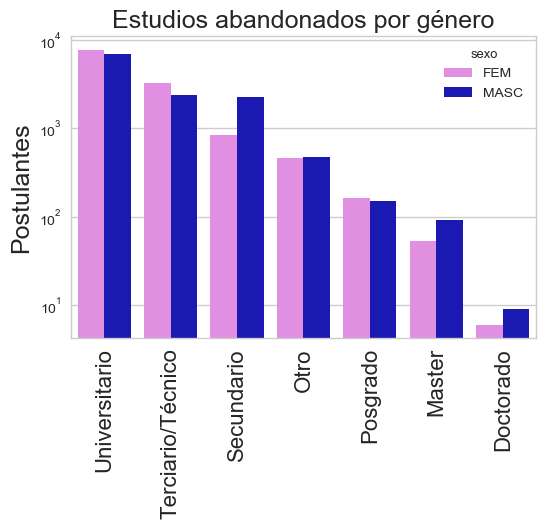

In [15]:
graf = sns.countplot(x="nombre", hue="sexo", data=postulantes_educacion_abandonada_con_genero, palette=mujer_hombre, order=postulantes_educacion_abandonada_con_genero['nombre'].value_counts().index);
graf.set_yscale('log');
graf.set_xticklabels(graf.get_xticklabels(), rotation=90, fontsize=16)
graf.set_title("Estudios abandonados por género", fontsize=18)
graf.set_xlabel("", fontsize=18)
graf.set_ylabel("Postulantes", fontsize=18)

Text(0,0.5,'Postulantes')

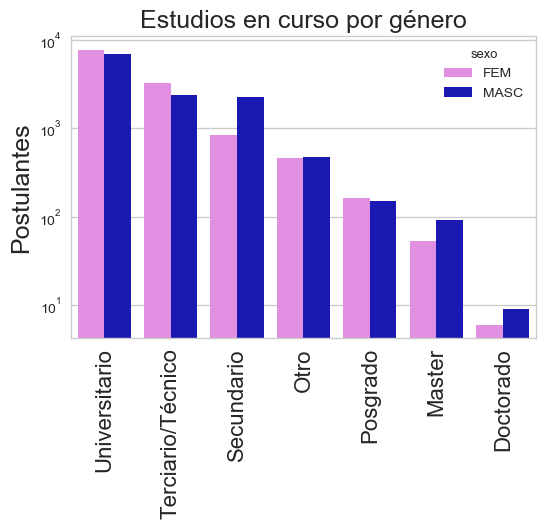

In [16]:
graf = sns.countplot(x="nombre", hue="sexo", data=postulantes_educacion_abandonada_con_genero, palette=mujer_hombre, order=postulantes_educacion_abandonada_con_genero['nombre'].value_counts().index);
graf.set_yscale('log');
graf.set_xticklabels(graf.get_xticklabels(), rotation=90, fontsize=16)
graf.set_title("Estudios en curso por género", fontsize=18)
graf.set_xlabel("", fontsize=18)
graf.set_ylabel("Postulantes", fontsize=18)

In [17]:
postulaciones = pd.read_csv("../Data/datos_navent_fiuba/fiuba_4_postulaciones.csv");
postulaciones.head()

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34
1,1111920714,NM5M,2018-02-06 09:04:50
2,1112346945,NM5M,2018-02-22 09:04:47
3,1112345547,NM5M,2018-02-22 09:04:59
4,1112237522,5awk,2018-01-25 18:55:03


In [18]:
postulaciones_por_genero = pd.merge(postulaciones, postulantes_genero_y_edad, on='idpostulante', how='inner');
postulaciones_por_genero.head()

,idaviso,idpostulante,fechapostulacion,fechanacimiento,sexo
0,1112257047,NM5M,2018-01-15 16:22:34,1970-12-03,FEM
1,1111920714,NM5M,2018-02-06 09:04:50,1970-12-03,FEM
2,1112346945,NM5M,2018-02-22 09:04:47,1970-12-03,FEM
3,1112345547,NM5M,2018-02-22 09:04:59,1970-12-03,FEM
4,1112237522,5awk,2018-01-25 18:55:03,1962-12-04,FEM


Text(0.5,1,'Cantidad de Postulaciones por Género')

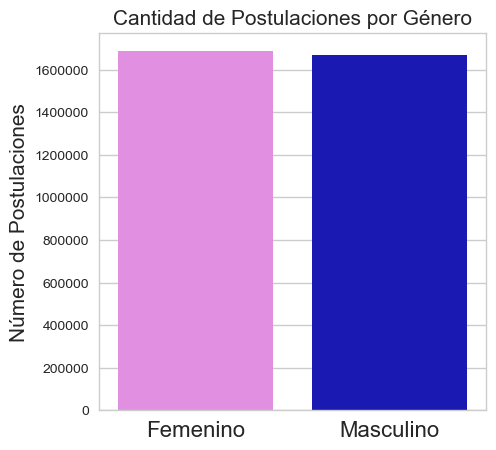

In [19]:
plt.figure(figsize=(5,5));
graf = sns.countplot(x='sexo', data=postulaciones_por_genero, order=postulaciones_por_genero['sexo'].value_counts().index, orient='v', palette=mujer_hombre)
graf.set_xticklabels(generos_labels(graf.get_xticklabels()),rotation=0, fontsize=16)
graf.set_xlabel("", fontsize=15)
graf.set_ylabel("Número de Postulaciones", fontsize=15)
graf.set_title("Cantidad de Postulaciones por Género", fontsize=15)

In [20]:
vistas = pd.read_csv("../Data/datos_navent_fiuba/fiuba_3_vistas.csv");
vistas.head()

,idAviso,timestamp,idpostulante
0,1111780242,2018-02-23T13:38:13.187-0500,YjVJQ6Z
1,1112263876,2018-02-23T13:38:14.296-0500,BmVpYoR
2,1112327963,2018-02-23T13:38:14.329-0500,wVkBzZd
3,1112318643,2018-02-23T13:38:17.921-0500,OqmP9pv
4,1111903673,2018-02-23T13:38:18.973-0500,DrpbXDP


In [21]:
vistas_por_genero = pd.merge(vistas, postulantes_genero_y_edad, on='idpostulante', how='inner');
vistas_por_genero.head()

,idAviso,timestamp,idpostulante,fechanacimiento,sexo
0,1111780242,2018-02-23T13:38:13.187-0500,YjVJQ6Z,1991-11-16,MASC
1,1112301574,2018-02-27T11:28:37.162-0500,YjVJQ6Z,1991-11-16,MASC
2,1112319451,2018-02-27T11:26:31.101-0500,YjVJQ6Z,1991-11-16,MASC
3,1112326950,2018-02-27T11:28:43.417-0500,YjVJQ6Z,1991-11-16,MASC
4,1112263876,2018-02-23T13:38:14.296-0500,BmVpYoR,1989-12-08,MASC


Text(0.5,1,'Cantidad de Vistas por Género')

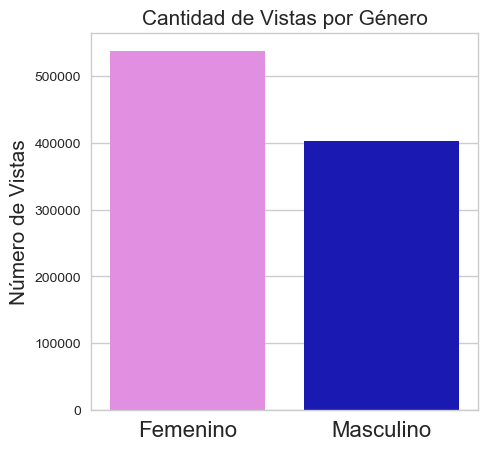

In [22]:
plt.figure(figsize=(5,5));
graf = sns.countplot(x='sexo', data=vistas_por_genero, order=vistas_por_genero['sexo'].value_counts().index, orient='v', palette=mujer_hombre)
graf.set_xticklabels(generos_labels(graf.get_xticklabels()),rotation=0, fontsize=16)
graf.set_xlabel("", fontsize=15)
graf.set_ylabel("Número de Vistas", fontsize=15)
graf.set_title("Cantidad de Vistas por Género", fontsize=15)

In [23]:
vistas_por_postulante_con_genero = vistas_por_genero.groupby('idpostulante').agg({'idAviso':'count','sexo':'max'})
vistas_por_postulante_con_genero.columns=['cantidadVistas', 'sexo']
vistas_por_postulante_con_genero.reset_index(level=0, inplace=True);
vistas_por_postulante_con_genero.head()

,idpostulante,cantidadVistas,sexo
0,0z5VvGv,3,MASC
1,0zB026d,6,FEM
2,0zB03O9,45,FEM
3,0zB0YGv,18,FEM
4,0zB0xL1,2,MASC


In [24]:
postulaciones_por_postulante_con_genero = postulaciones_por_genero.groupby('idpostulante').agg({'idaviso':'count','sexo':'max'})
postulaciones_por_postulante_con_genero.columns=['cantidadPostulaciones', 'sexo'];
postulaciones_por_postulante_con_genero.reset_index(level=0, inplace=True);
postulaciones_por_postulante_con_genero.head()

,idpostulante,cantidadPostulaciones,sexo
0,0z5VvGv,34,MASC
1,0zB026d,3,FEM
2,0zB03O9,17,FEM
3,0zB08lq,1,MASC
4,0zB0NWY,1,FEM


In [25]:
vistas_y_postulaciones_por_postulante= pd.merge(postulaciones_por_postulante_con_genero, vistas_por_postulante_con_genero, on='idpostulante', how='inner');
vistas_y_postulaciones_por_postulante=vistas_y_postulaciones_por_postulante.drop('sexo_y',1);
vistas_y_postulaciones_por_postulante.head()

,idpostulante,cantidadPostulaciones,sexo_x,cantidadVistas
0,0z5VvGv,34,MASC,3
1,0zB026d,3,FEM,6
2,0zB03O9,17,FEM,45
3,0zB0YGv,51,FEM,18
4,0zB0xL1,4,MASC,2


In [26]:
vistas_y_postulaciones_por_postulante['probabilidadDePostularse']= vistas_y_postulaciones_por_postulante['cantidadPostulaciones']/(vistas_y_postulaciones_por_postulante['cantidadVistas']+vistas_y_postulaciones_por_postulante['cantidadPostulaciones']);
vistas_y_postulaciones_por_postulante.head()

,idpostulante,cantidadPostulaciones,sexo_x,cantidadVistas,probabilidadDePostularse
0,0z5VvGv,34,MASC,3,0.918919
1,0zB026d,3,FEM,6,0.333333
2,0zB03O9,17,FEM,45,0.274194
3,0zB0YGv,51,FEM,18,0.739130
4,0zB0xL1,4,MASC,2,0.666667


In [27]:
postulaciones_por_vistas_por_genero=vistas_y_postulaciones_por_postulante.groupby('sexo_x').agg({'probabilidadDePostularse':'mean'});
postulaciones_por_vistas_por_genero.reset_index(level=0, inplace=True);
postulaciones_por_vistas_por_genero.head()

,sexo_x,probabilidadDePostularse
0,FEM,0.550769
1,MASC,0.586230


Text(0.5,1,'Relacion entre Postulaciones y Anuncios Vistos por Género')

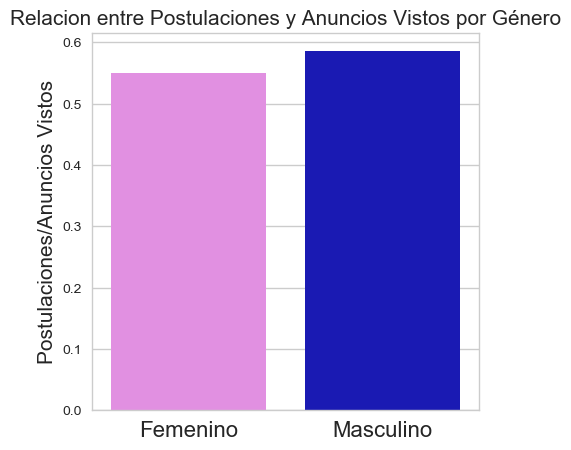

In [28]:
#Quienes se postulan mas seguido? El hombre es mas "confiado", "caradura" como indican algunos estudios para nuestro set de datos?
plt.figure(figsize=(5,5));
graf = sns.barplot(x=postulaciones_por_vistas_por_genero.sexo_x, y=postulaciones_por_vistas_por_genero.probabilidadDePostularse, orient='v', palette=mujer_hombre)
graf.set_xticklabels(generos_labels(graf.get_xticklabels()),rotation=0, fontsize=16)
graf.set_xlabel("", fontsize=15)
graf.set_ylabel("Postulaciones/Anuncios Vistos", fontsize=15)
graf.set_title("Relacion entre Postulaciones y Anuncios Vistos por Género", fontsize=15)

In [29]:
avisos=pd.read_csv("../Data/datos_navent_fiuba/fiuba_6_avisos_detalle.csv");
avisos.head()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL


In [30]:
avisos_reducidos=avisos.drop(['titulo','descripcion','nombre_zona','ciudad','mapacalle','denominacion_empresa'],1);
avisos_reducidos.head()

,idaviso,idpais,tipo_de_trabajo,nivel_laboral,nombre_area
0,8725750,1,Full-time,Senior / Semi-Senior,Comercial
1,17903700,1,Full-time,Senior / Semi-Senior,Salud
2,1000150677,1,Full-time,Senior / Semi-Senior,Transporte
3,1000610287,1,Full-time,Senior / Semi-Senior,Transporte
4,1000872556,1,Full-time,Senior / Semi-Senior,Producción


In [31]:
postulaciones_genero_y_detalles = pd.merge(postulaciones_por_genero, avisos_reducidos, on='idaviso', how='inner');
postulaciones_genero_y_detalles.head()

,idaviso,idpostulante,fechapostulacion,fechanacimiento,sexo,idpais,tipo_de_trabajo,nivel_laboral,nombre_area
0,1112257047,NM5M,2018-01-15 16:22:34,1970-12-03,FEM,1,Part-time,Otro,Atención al Cliente
1,1112257047,1kJqGb,2018-01-15 10:23:11,1984-04-21,FEM,1,Part-time,Otro,Atención al Cliente
2,1112257047,eOE9Rr,2018-01-15 10:42:07,1979-03-05,FEM,1,Part-time,Otro,Atención al Cliente
3,1112257047,Zrx8Xz,2018-01-30 10:18:14,1978-07-28,FEM,1,Part-time,Otro,Atención al Cliente
4,1112257047,ZrKNQY,2018-01-16 17:19:38,1985-06-26,FEM,1,Part-time,Otro,Atención al Cliente


In [32]:
postulaciones_genero_y_detalles['nombre_area'].value_counts()

Ventas                                   402487
Administración                           288459
Producción                               272440
Comercial                                214094
Atención al Cliente                      193460
Recepcionista                            136162
Call Center                              124888
Telemarketing                             86300
Tesorería                                 77520
Mantenimiento y Limpieza                  61741
Contabilidad                              55108
Almacén / Depósito / Expedición           52276
Gastronomia                               50219
Recursos Humanos                          45311
Secretaria                                38878
Logística                                 36572
Administración de Personal                36540
Créditos y Cobranzas                      36327
Marketing                                 29648
Legal                                     28943
Soporte Técnico                         

In [33]:
postulaciones_genero_y_detalles['nivel_laboral'].value_counts()

Senior / Semi-Senior                    1991521
Junior                                   681988
Otro                                     254300
Jefe / Supervisor / Responsable           83498
Gerencia / Alta Gerencia / Dirección      23417
Name: nivel_laboral, dtype: int64

In [34]:
postulaciones_genero_y_detalles['tipo_de_trabajo'].value_counts()

Full-time          2599565
Part-time           389518
Pasantia             15252
Por Horas            11605
Temporario            9272
Por Contrato          3779
Teletrabajo           3762
Fines de Semana       1849
Primer empleo          122
Name: tipo_de_trabajo, dtype: int64

Text(0,0.5,'Cantidad de Postulaciones')

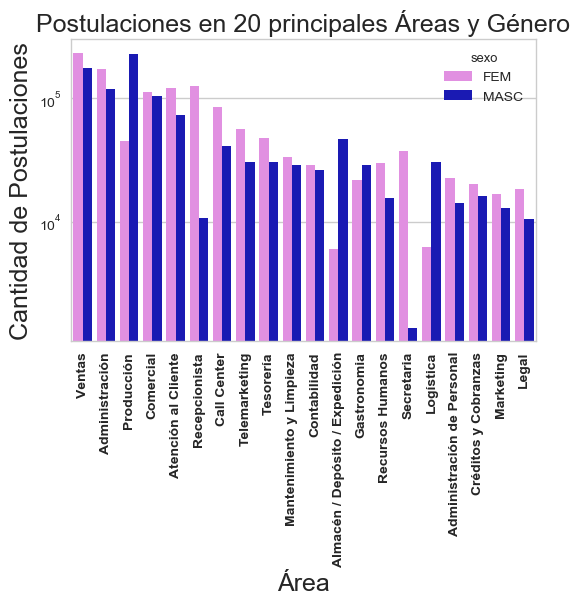

In [35]:
#A ver que onda...
graf = sns.countplot(x="nombre_area", hue="sexo", data=postulaciones_genero_y_detalles, palette=mujer_hombre, order=postulaciones_genero_y_detalles['nombre_area'].value_counts().iloc[:20].index);
graf.set_yscale('log');
graf.set_xticklabels(graf.get_xticklabels(), rotation=90, weight='bold')
graf.set_title("Postulaciones en 20 principales Áreas y Género", fontsize=18)
graf.set_xlabel("Área", fontsize=18)
graf.set_ylabel("Cantidad de Postulaciones", fontsize=18)

Text(0,0.5,'Cantidad de Postulaciones')

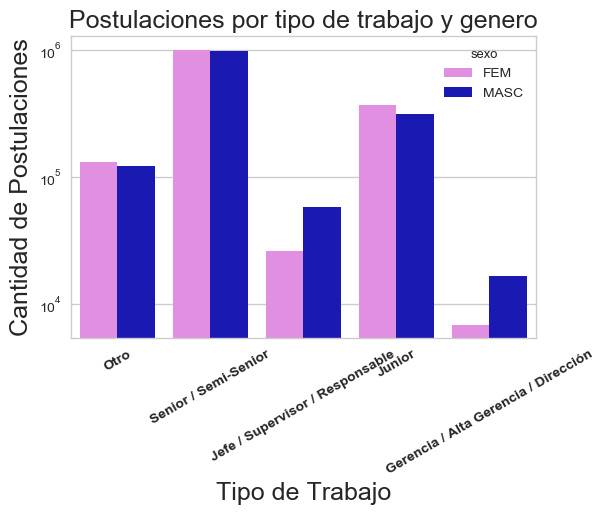

In [36]:
#Hay alguna diferencia entre el tipo de trabajo que se busca? La mujer tiene menos tiempo de trabajar por tareas del hogar?
#Que pasa en los cargos gerenciales?
graf = sns.countplot(x="nivel_laboral", hue="sexo", data=postulaciones_genero_y_detalles, palette=mujer_hombre)
graf.set_yscale('log');
graf.set_xticklabels(graf.get_xticklabels(), rotation=30, weight='bold')
graf.set_title("Postulaciones por tipo de trabajo y genero", fontsize=18)
graf.set_xlabel("Tipo de Trabajo", fontsize=18)
graf.set_ylabel("Cantidad de Postulaciones", fontsize=18)

Text(0,0.5,'Cantidad de Postulaciones')

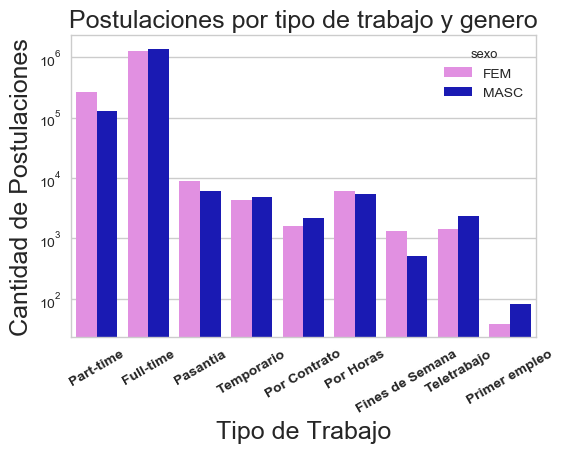

In [37]:
graf = sns.countplot(x="tipo_de_trabajo", hue="sexo", data=postulaciones_genero_y_detalles, palette=mujer_hombre)
graf.set_yscale('log');
graf.set_xticklabels(graf.get_xticklabels(), rotation=30, weight='bold')
graf.set_title("Postulaciones por tipo de trabajo y genero", fontsize=18)
graf.set_xlabel("Tipo de Trabajo", fontsize=18)
graf.set_ylabel("Cantidad de Postulaciones", fontsize=18)

In [38]:
postulaciones_areas_y_genero=postulaciones_genero_y_detalles;
postulaciones_areas_y_genero['eshombre']=(postulaciones_areas_y_genero['sexo']=='MASC');
postulaciones_areas_y_genero['esmujer']=(postulaciones_areas_y_genero['sexo']=='FEM');
postulaciones_areas_y_genero.head()

,idaviso,idpostulante,fechapostulacion,fechanacimiento,sexo,idpais,tipo_de_trabajo,nivel_laboral,nombre_area,eshombre,esmujer
0,1112257047,NM5M,2018-01-15 16:22:34,1970-12-03,FEM,1,Part-time,Otro,Atención al Cliente,False,True
1,1112257047,1kJqGb,2018-01-15 10:23:11,1984-04-21,FEM,1,Part-time,Otro,Atención al Cliente,False,True
2,1112257047,eOE9Rr,2018-01-15 10:42:07,1979-03-05,FEM,1,Part-time,Otro,Atención al Cliente,False,True
3,1112257047,Zrx8Xz,2018-01-30 10:18:14,1978-07-28,FEM,1,Part-time,Otro,Atención al Cliente,False,True
4,1112257047,ZrKNQY,2018-01-16 17:19:38,1985-06-26,FEM,1,Part-time,Otro,Atención al Cliente,False,True


In [39]:
postulaciones_areas_y_genero=postulaciones_areas_y_genero.groupby(['nombre_area']).agg({'eshombre':'sum', 'esmujer':'sum'});
postulaciones_areas_y_genero.head()

,eshombre,esmujer
nombre_area,,
Abastecimiento,9075.0,2002.0
Administracion de Seguros,1928.0,2559.0
Administración,118377.0,170082.0
Administración de Base de Datos,337.0,176.0
Administración de Personal,14148.0,22392.0


In [40]:
postulaciones_areas_y_genero['desigualdad']=np.absolute(postulaciones_areas_y_genero['eshombre']-postulaciones_areas_y_genero['esmujer'])/(postulaciones_areas_y_genero['eshombre']+postulaciones_areas_y_genero['esmujer'])
postulaciones_areas_y_genero['total']=(postulaciones_areas_y_genero['eshombre']+postulaciones_areas_y_genero['esmujer']);
postulaciones_areas_y_genero=postulaciones_areas_y_genero.sort_values('desigualdad',ascending=0);
postulaciones_areas_y_genero.head(30)

,eshombre,esmujer,desigualdad,total
nombre_area,,,,
Traduccion,0.0,1.0,1.000000,1.0
Topografía,1.0,0.0,1.000000,1.0
Secretaria,1393.0,37485.0,0.928340,38878.0
Otras áreas técnicas en salud,24.0,303.0,0.853211,327.0
Mantenimiento,25919.0,2115.0,0.849112,28034.0
Estética y Cuidado Personal,15.0,180.0,0.846154,195.0
Internet,119.0,10.0,0.844961,129.0
Recepcionista,10716.0,125446.0,0.842599,136162.0
Ingeniería en Petróleo y Petroquímica,255.0,25.0,0.821429,280.0


In [41]:
print(len(postulaciones_genero_y_detalles));
print(postulaciones_areas_y_genero['total'].sum());
print(postulaciones_areas_y_genero['total'].mean());

3034724
3034724.0
18617.938650306747


In [42]:
postulaciones_areas_y_genero_acotada = postulaciones_areas_y_genero[postulaciones_areas_y_genero['total']>500];
postulaciones_areas_y_genero_acotada.head(30)

,eshombre,esmujer,desigualdad,total
nombre_area,,,,
Secretaria,1393.0,37485.0,0.928340,38878.0
Mantenimiento,25919.0,2115.0,0.849112,28034.0
Recepcionista,10716.0,125446.0,0.842599,136162.0
Transporte,16742.0,1699.0,0.815737,18441.0
Ingeniería Eléctrica y Electrónica,4808.0,540.0,0.798055,5348.0
Diseño Textil e Indumentaria,72.0,589.0,0.782148,661.0
Mineria/Petroleo/Gas,3564.0,458.0,0.772253,4022.0
Almacén / Depósito / Expedición,46321.0,5955.0,0.772171,52276.0
Distribución,11573.0,1597.0,0.757479,13170.0


Text(0,0.5,'Cantidad de Postulaciones')

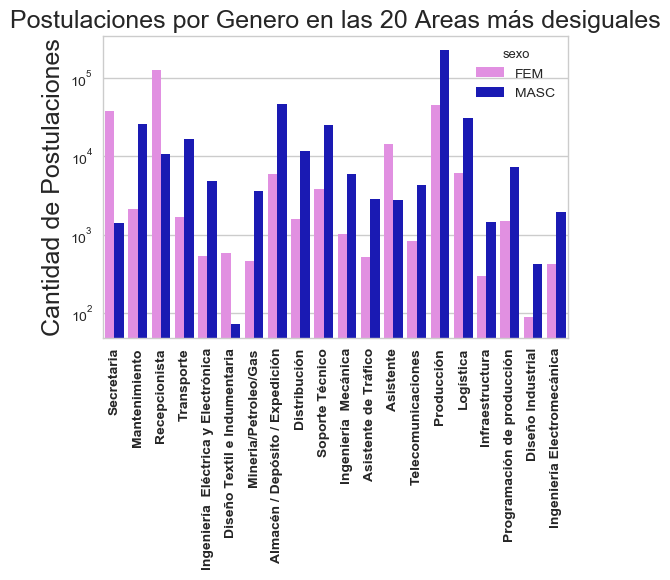

In [43]:
#Cuales son las areas mas desiguales? Son arbitrarias o determinadas por roles de genero?
graf = sns.countplot(x="nombre_area", hue="sexo", data=postulaciones_genero_y_detalles, palette=mujer_hombre, order=postulaciones_areas_y_genero_acotada.head(20).index);
graf.set_yscale('log');
graf.set_xticklabels(graf.get_xticklabels(), rotation=90, weight='bold')
graf.set_title("Postulaciones por Genero en las 20 Areas más desiguales", fontsize=18)
graf.set_xlabel("", fontsize=18)
graf.set_ylabel("Cantidad de Postulaciones", fontsize=18)

In [44]:
postulaciones_universitario_completo = pd.merge(postulaciones_genero_y_detalles,postulantes_educacion_universitaria_completa[['idpostulante','nombre', 'estado']],on='idpostulante', how='right');
postulaciones_universitario_completo.head()

,idaviso,idpostulante,fechapostulacion,fechanacimiento,sexo,idpais,tipo_de_trabajo,nivel_laboral,nombre_area,eshombre,esmujer,nombre,estado
0,1.112257e+09,ZrKNQY,2018-01-16 17:19:38,1985-06-26,FEM,1.0,Part-time,Otro,Atención al Cliente,False,True,Universitario,Graduado
1,1.112346e+09,ZrKNQY,2018-02-19 15:56:23,1985-06-26,FEM,1.0,Part-time,Junior,Atención al Cliente,False,True,Universitario,Graduado
2,1.112285e+09,ZrKNQY,2018-01-24 17:03:48,1985-06-26,FEM,1.0,Full-time,Senior / Semi-Senior,Secretaria,False,True,Universitario,Graduado
3,1.112264e+09,ZrKNQY,2018-01-17 17:21:40,1985-06-26,FEM,1.0,Full-time,Senior / Semi-Senior,Recepcionista,False,True,Universitario,Graduado
4,1.112304e+09,ZrKNQY,2018-02-05 18:27:50,1985-06-26,FEM,1.0,Full-time,Senior / Semi-Senior,Recepcionista,False,True,Universitario,Graduado


In [45]:
postulaciones_areas_y_genero_univ_completo=postulaciones_universitario_completo;
postulaciones_areas_y_genero_univ_completo['eshombre']=(postulaciones_areas_y_genero_univ_completo['sexo']=='MASC');
postulaciones_areas_y_genero_univ_completo['esmujer']=(postulaciones_areas_y_genero_univ_completo['sexo']=='FEM');
postulaciones_areas_y_genero_univ_completo.head()

,idaviso,idpostulante,fechapostulacion,fechanacimiento,sexo,idpais,tipo_de_trabajo,nivel_laboral,nombre_area,eshombre,esmujer,nombre,estado
0,1.112257e+09,ZrKNQY,2018-01-16 17:19:38,1985-06-26,FEM,1.0,Part-time,Otro,Atención al Cliente,False,True,Universitario,Graduado
1,1.112346e+09,ZrKNQY,2018-02-19 15:56:23,1985-06-26,FEM,1.0,Part-time,Junior,Atención al Cliente,False,True,Universitario,Graduado
2,1.112285e+09,ZrKNQY,2018-01-24 17:03:48,1985-06-26,FEM,1.0,Full-time,Senior / Semi-Senior,Secretaria,False,True,Universitario,Graduado
3,1.112264e+09,ZrKNQY,2018-01-17 17:21:40,1985-06-26,FEM,1.0,Full-time,Senior / Semi-Senior,Recepcionista,False,True,Universitario,Graduado
4,1.112304e+09,ZrKNQY,2018-02-05 18:27:50,1985-06-26,FEM,1.0,Full-time,Senior / Semi-Senior,Recepcionista,False,True,Universitario,Graduado


In [46]:
postulaciones_areas_y_genero_univ_completo=postulaciones_areas_y_genero_univ_completo.groupby(['nombre_area']).agg({'eshombre':'sum', 'esmujer':'sum'});
postulaciones_areas_y_genero_univ_completo.head()

,eshombre,esmujer
nombre_area,,
Abastecimiento,960.0,388.0
Administracion de Seguros,491.0,654.0
Administración,25821.0,35503.0
Administración de Base de Datos,121.0,49.0
Administración de Personal,3062.0,6213.0


In [47]:
postulaciones_areas_y_genero_univ_completo['desigualdad']=np.absolute(postulaciones_areas_y_genero_univ_completo['eshombre']-postulaciones_areas_y_genero_univ_completo['esmujer'])/(postulaciones_areas_y_genero_univ_completo['eshombre']+postulaciones_areas_y_genero_univ_completo['esmujer'])
postulaciones_areas_y_genero_univ_completo['total']=(postulaciones_areas_y_genero_univ_completo['eshombre']+postulaciones_areas_y_genero_univ_completo['esmujer']);
postulaciones_areas_y_genero_univ_completo=postulaciones_areas_y_genero_univ_completo.sort_values('desigualdad',ascending=0);
postulaciones_areas_y_genero_univ_completo.head(30)

,eshombre,esmujer,desigualdad,total
nombre_area,,,,
Topografía,1.0,0.0,1.000000,1.0
Farmacia hospitalaria,0.0,2.0,1.000000,2.0
Otras áreas técnicas en salud,1.0,31.0,0.937500,32.0
Secretaria,249.0,6643.0,0.927742,6892.0
Estética y Cuidado Personal,1.0,18.0,0.894737,19.0
Recepcionista,1116.0,15404.0,0.864891,16520.0
Diseño Textil e Indumentaria,24.0,327.0,0.863248,351.0
Veterinaria,40.0,4.0,0.818182,44.0
Mantenimiento,4468.0,570.0,0.773720,5038.0


In [48]:
print(len(postulaciones_universitario_completo));
print(postulaciones_areas_y_genero_univ_completo['total'].sum());
print(postulaciones_areas_y_genero_univ_completo['total'].mean());

600645
600252.0
3728.273291925466


In [49]:
postulaciones_areas_y_genero_univ_completo_acot = postulaciones_areas_y_genero_univ_completo[postulaciones_areas_y_genero_univ_completo['total']>500];
postulaciones_areas_y_genero_univ_completo_acot.head(30)

,eshombre,esmujer,desigualdad,total
nombre_area,,,,
Secretaria,249.0,6643.0,0.927742,6892.0
Recepcionista,1116.0,15404.0,0.864891,16520.0
Mantenimiento,4468.0,570.0,0.773720,5038.0
Ingeniería Eléctrica y Electrónica,2939.0,420.0,0.749926,3359.0
Mineria/Petroleo/Gas,1852.0,316.0,0.708487,2168.0
Infraestructura,512.0,92.0,0.695364,604.0
Soporte Técnico,4869.0,923.0,0.681285,5792.0
Ingeniería Mecánica,3829.0,750.0,0.672418,4579.0
Asistente,584.0,2978.0,0.672094,3562.0


Text(0,0.5,'Cantidad de Postulaciones')

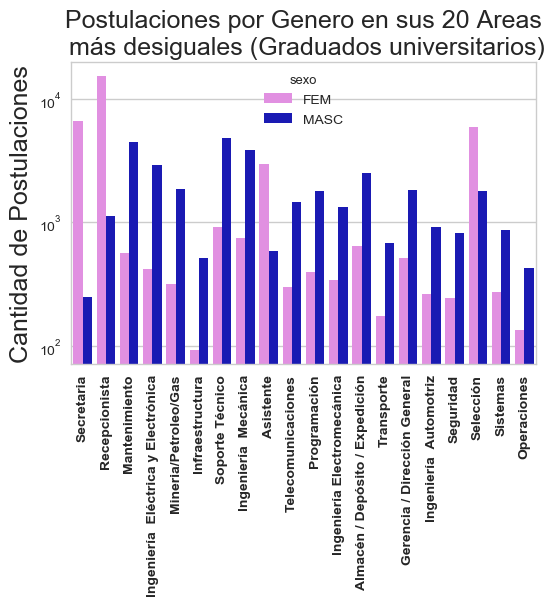

In [50]:
#La desigualdad baja en graduados universitarios? Que areas nuevas aparecen?
graf = sns.countplot(x="nombre_area", hue="sexo", data=postulaciones_universitario_completo, palette=mujer_hombre, order=postulaciones_areas_y_genero_univ_completo_acot.head(20).index);
graf.set_yscale('log');
graf.set_xticklabels(graf.get_xticklabels(), rotation=90, weight='bold')
graf.set_title("Postulaciones por Genero en sus 20 Areas\n más desiguales (Graduados universitarios)", fontsize=18)
graf.set_xlabel("", fontsize=18)
graf.set_ylabel("Cantidad de Postulaciones", fontsize=18)

In [51]:
postulantes_genero_no_declara=pd.read_csv("../Data/datos_navent_fiuba/fiuba_2_postulantes_genero_y_edad.csv");
postulantes_genero_no_declara=postulantes_genero_no_declara[postulantes_genero_no_declara['sexo']=='NO_DECLARA'];
postulantes_genero_no_declara.head()

,idpostulante,fechanacimiento,sexo
1377,Z8warE,NaN,NO_DECLARA
2149,Nzj9lz,NaN,NO_DECLARA
3655,5boBRZ,NaN,NO_DECLARA
3928,Z4z8R8,NaN,NO_DECLARA
4725,8LqOvL,NaN,NO_DECLARA


In [52]:
postulaciones_gen_no_declara = pd.merge(postulaciones, postulantes_genero_no_declara, on='idpostulante', how='inner');
postulaciones_gen_no_declara.head()

,idaviso,idpostulante,fechapostulacion,fechanacimiento,sexo
0,1111972061,1Ba1vE,2018-02-06 08:19:38,NaN,NO_DECLARA
1,1112312366,1Ba1vE,2018-02-09 19:27:19,NaN,NO_DECLARA
2,1111753928,1Ba1vE,2018-02-09 19:28:33,NaN,NO_DECLARA
3,1112261676,1Ba1vE,2018-02-09 19:28:59,NaN,NO_DECLARA
4,1112254546,1Ba1vE,2018-02-09 19:29:19,NaN,NO_DECLARA


In [53]:
postulaciones_gen_no_declara_detalles = pd.merge(postulaciones_gen_no_declara, avisos, on='idaviso', how='inner');
postulaciones_gen_no_declara_detalles.head()

,idaviso,idpostulante,fechapostulacion,fechanacimiento,sexo,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,1111972061,1Ba1vE,2018-02-06 08:19:38,NaN,NO_DECLARA,1,Cajero Bancario - eventual verano (Sur GBA),<p><strong>Banco Columbia </strong>se encuentr...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Caja,Banco Columbia SA
1,1111972061,6rP12vx,2018-02-07 08:57:06,NaN,NO_DECLARA,1,Cajero Bancario - eventual verano (Sur GBA),<p><strong>Banco Columbia </strong>se encuentr...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Caja,Banco Columbia SA
2,1111972061,96X1Wx9,2018-01-17 13:59:07,NaN,NO_DECLARA,1,Cajero Bancario - eventual verano (Sur GBA),<p><strong>Banco Columbia </strong>se encuentr...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Caja,Banco Columbia SA
3,1111972061,5mPW6DX,2018-01-15 07:11:07,NaN,NO_DECLARA,1,Cajero Bancario - eventual verano (Sur GBA),<p><strong>Banco Columbia </strong>se encuentr...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Caja,Banco Columbia SA
4,1111972061,VNrwaGR,2018-02-07 09:18:07,NaN,NO_DECLARA,1,Cajero Bancario - eventual verano (Sur GBA),<p><strong>Banco Columbia </strong>se encuentr...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Caja,Banco Columbia SA


In [54]:
postulaciones_gen_no_declara_areas = postulaciones_gen_no_declara_detalles.groupby(['nombre_area'], as_index=False).agg({'idpostulante':'count'});
postulaciones_gen_no_declara_areas.head()

,nombre_area,idpostulante
0,Abastecimiento,208
1,Administracion de Seguros,38
2,Administración,2676
3,Administración de Base de Datos,10
4,Administración de Personal,471


Text(0.5,1,'Postulacion de usuarios que no declaran Género\nen sus 20 areas mas populares')

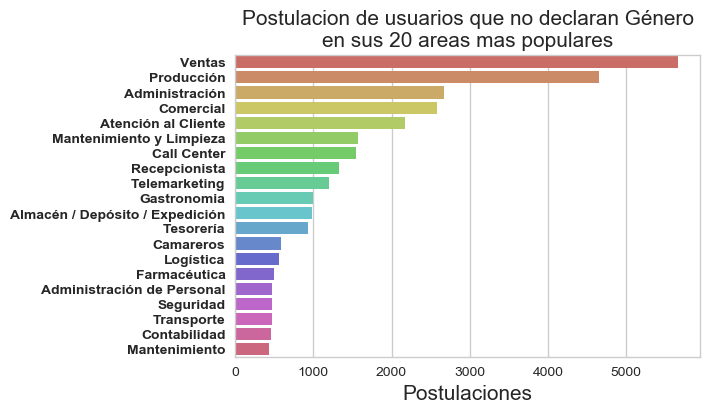

In [55]:
#A ver que onda...
graf = sns.barplot(y=postulaciones_gen_no_declara_areas['nombre_area'], x=postulaciones_gen_no_declara_areas['idpostulante'],order=postulaciones_gen_no_declara_detalles['nombre_area'].value_counts().iloc[:20].index, orient='h', palette='hls')
graf.set_yticklabels(graf.get_yticklabels(), weight='bold')
graf.set_xlabel("Postulaciones", fontsize=15)
graf.set_ylabel("", fontsize=15)
graf.set_title("Postulacion de usuarios que no declaran Género\nen sus 20 areas mas populares", fontsize=15)

Text(0.5,1,'Postulacion de usuarios que no declaran Género\nen las 20 areas mas desiguales')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


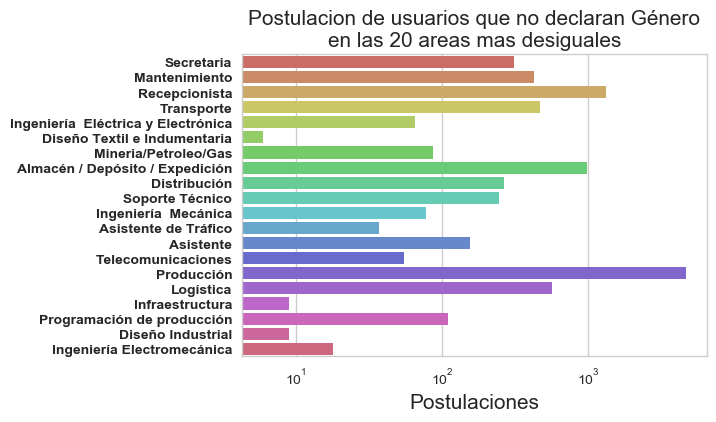

In [56]:
#Si se pensaran postular a areas en las que el genero puede ser excluyente lo especificarian, supongo.
graf = sns.barplot(y=postulaciones_gen_no_declara_areas['nombre_area'], x=postulaciones_gen_no_declara_areas['idpostulante'],order=postulaciones_areas_y_genero_acotada.head(20).index, orient='h', palette='hls')
graf.set_xscale('log');
graf.set_yticklabels(graf.get_yticklabels(), weight='bold')
graf.set_xlabel("Postulaciones", fontsize=15)
graf.set_ylabel("", fontsize=15)
graf.set_title("Postulacion de usuarios que no declaran Género\nen las 20 areas mas desiguales", fontsize=15)

In [57]:
postulaciones_detalles=postulaciones_genero_y_detalles;
postulaciones_detalles['sexo']='DECLARA';
postulaciones_detalles=pd.concat([postulaciones_detalles,postulaciones_gen_no_declara_detalles])
postulaciones_detalles.drop(['ciudad','descripcion','eshombre','esmujer','mapacalle','denominacion_empresa','titulo','nombre_zona'],axis=1,inplace=True);
postulaciones_detalles['declara_sexo']=postulaciones_detalles['sexo']=='DECLARA'
postulaciones_detalles['no_declara_sexo']=postulaciones_detalles['sexo']=='NO_DECLARA'
postulaciones_detalles.head()

,fechanacimiento,fechapostulacion,idaviso,idpais,idpostulante,nivel_laboral,nombre_area,sexo,tipo_de_trabajo,declara_sexo,no_declara_sexo
0,1970-12-03,2018-01-15 16:22:34,1112257047,1,NM5M,Otro,Atención al Cliente,DECLARA,Part-time,True,False
1,1984-04-21,2018-01-15 10:23:11,1112257047,1,1kJqGb,Otro,Atención al Cliente,DECLARA,Part-time,True,False
2,1979-03-05,2018-01-15 10:42:07,1112257047,1,eOE9Rr,Otro,Atención al Cliente,DECLARA,Part-time,True,False
3,1978-07-28,2018-01-30 10:18:14,1112257047,1,Zrx8Xz,Otro,Atención al Cliente,DECLARA,Part-time,True,False
4,1985-06-26,2018-01-16 17:19:38,1112257047,1,ZrKNQY,Otro,Atención al Cliente,DECLARA,Part-time,True,False


In [58]:
postulaciones_areas_declara_nodeclara=postulaciones_detalles.groupby('nombre_area', as_index=False).agg({'declara_sexo':'sum','no_declara_sexo':sum});
postulaciones_areas_declara_nodeclara.head()

,nombre_area,declara_sexo,no_declara_sexo
0,Abastecimiento,11077.0,208.0
1,Administracion de Seguros,4487.0,38.0
2,Administración,288459.0,2676.0
3,Administración de Base de Datos,513.0,10.0
4,Administración de Personal,36540.0,471.0


In [59]:
#postulaciones_gen_no_declara_detalles y postulaciones_genero_y_detalles
postulaciones_areas_declara_nodeclara_en_proporcion=postulaciones_areas_declara_nodeclara
cant_post_no_declara=len(postulaciones_gen_no_declara_detalles)+1;
cant_post_declara=len(postulaciones_genero_y_detalles)+1;
relacion=cant_post_no_declara/cant_post_declara;
postulaciones_areas_declara_nodeclara_en_proporcion['declara_sexo']=postulaciones_areas_declara_nodeclara_en_proporcion['declara_sexo']*relacion
postulaciones_areas_declara_nodeclara_en_proporcion=pd.melt(postulaciones_areas_declara_nodeclara_en_proporcion, id_vars=['nombre_area'], value_vars=['declara_sexo','no_declara_sexo'])
postulaciones_areas_declara_nodeclara_en_proporcion.head()

,nombre_area,variable,value
0,Abastecimiento,declara_sexo,144.116251
1,Administracion de Seguros,declara_sexo,58.377685
2,Administración,declara_sexo,3752.968291
3,Administración de Base de Datos,declara_sexo,6.674338
4,Administración de Personal,declara_sexo,475.400183


Text(0.5,1,'Proporcion de postulaciones de usuarios que declaran \ny no declaran Género en las 20 areas mas desiguales')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


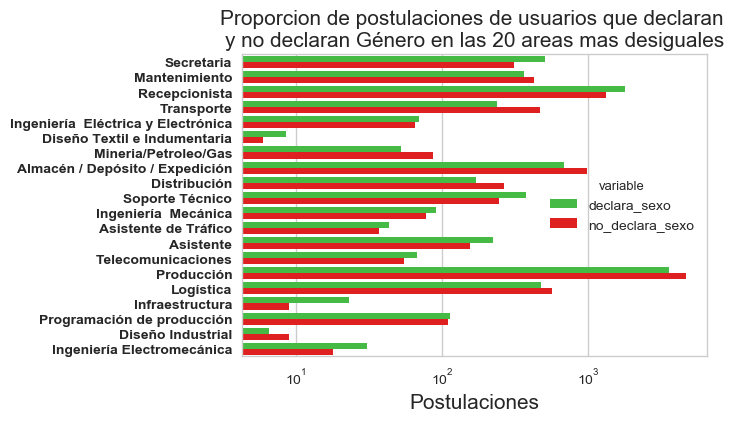

In [60]:
#Si se pensaran postular a areas en las que el genero puede ser excluyente lo especificarian, supongo.
graf = sns.barplot(y='nombre_area', x='value',hue='variable',data=postulaciones_areas_declara_nodeclara_en_proporcion,order=postulaciones_areas_y_genero_acotada.head(20).index, orient='h', palette=['limegreen','red'])
graf.set_xscale('log');
graf.set_yticklabels(graf.get_yticklabels(), weight='bold')
graf.set_xlabel("Postulaciones", fontsize=15)
graf.set_ylabel("", fontsize=15)
graf.set_title("Proporcion de postulaciones de usuarios que declaran \ny no declaran Género en las 20 areas mas desiguales", fontsize=15)
#No me dice nada

In [61]:
postulantes_no_declara_educacion=pd.merge(postulantes_educacion, postulantes_genero_no_declara, on='idpostulante', how='inner');
postulantes_no_declara_educacion.head()

,idpostulante,nombre,estado,fechanacimiento,sexo
0,Z8warE,Universitario,Graduado,NaN,NO_DECLARA
1,5boBRZ,Secundario,Graduado,NaN,NO_DECLARA
2,Z4z8R8,Terciario/Técnico,Graduado,NaN,NO_DECLARA
3,8LqOvL,Terciario/Técnico,En Curso,NaN,NO_DECLARA
4,8LqOvL,Secundario,Graduado,NaN,NO_DECLARA


Text(0,0.5,'Cantidad de Postulantes')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


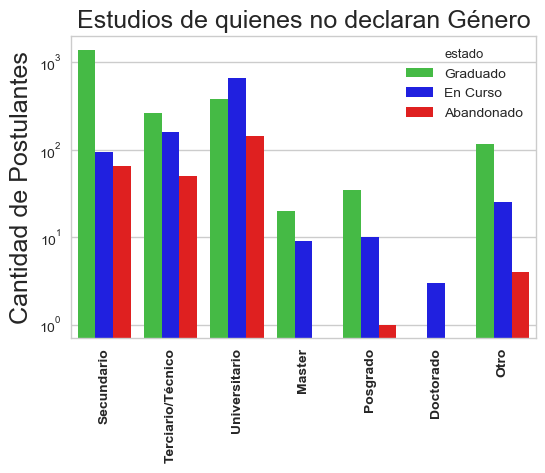

In [62]:
graf = sns.countplot(x="nombre", hue="estado", data=postulantes_no_declara_educacion, palette=['limegreen','blue','r'], 
                     order=['Secundario','Terciario/Técnico','Universitario','Master','Posgrado', 'Doctorado', 'Otro']);
graf.set_xticklabels(graf.get_xticklabels(), rotation=90, weight='bold')
graf.set_yscale('log');
graf.set_title("Estudios de quienes no declaran Género", fontsize=18)
graf.set_xlabel("", fontsize=18)
graf.set_ylabel("Cantidad de Postulantes", fontsize=18)

Text(0,0.5,'Cantidad de Postulantes')

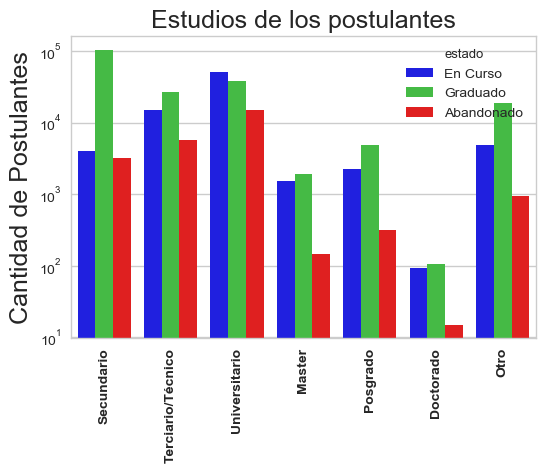

In [63]:
graf = sns.countplot(x="nombre", hue="estado", data=postulantes_educacion, palette=['blue','limegreen','r'],
                    order=['Secundario','Terciario/Técnico','Universitario','Master','Posgrado', 'Doctorado', 'Otro']);
graf.set_xticklabels(graf.get_xticklabels(), rotation=90, weight='bold')
graf.set_yscale('log');
graf.set_title("Estudios de los postulantes", fontsize=18)
graf.set_xlabel("", fontsize=18)
graf.set_ylabel("Cantidad de Postulantes", fontsize=18)